$\textbf{Problem 1: Python Configuration and Data Loading}$

In [1]:
import sys 
if sys.version_info[0] < 3: 
    raise Exception("Python 3 not detected.")
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import svm 
from scipy import io
for data_name in ["mnist", "spam", "cifar10"]: 
    data = io.loadmat("data/%s_data.mat" % data_name) 
    print("\nloaded %s data!" % data_name) 
    fields = "test_data", "training_data", "training_labels" 
    for field in fields: 
        print(field, data[field].shape)


loaded mnist data!
test_data (10000, 784)
training_data (60000, 784)
training_labels (60000, 1)

loaded spam data!
test_data (5857, 32)
training_data (5172, 32)
training_labels (5172, 1)

loaded cifar10 data!
test_data (10000, 3072)
training_data (50000, 3072)
training_labels (50000, 1)


All dependencies have been satisfied and all datasets have loaded properly.

$\textbf{Problem 2: Data Partitioning}$

In [2]:
np.random.seed(42)

(a) For the MNIST dataset, write code that sets aside 10,000 training images as a validation set. 

In [3]:
m_nist_data = io.loadmat("data/%s_data.mat" % "mnist")

In [4]:
len(m_nist_data['training_data'])

60000

In [5]:
mindex = np.arange(60000)

In [6]:
np.random.shuffle(mindex)

In [7]:
mvalidindex = mindex[0:10000]

In [8]:
mtrainindex = mindex[10000:]

In [9]:
mtraindata = np.array(m_nist_data['training_data'])

In [10]:
mtrainlabels = np.array(m_nist_data['training_labels'])

In [11]:
mnist_validation = mtraindata[mvalidindex]

In [12]:
mnist_validationlabels = mtrainlabels[mvalidindex]

In [13]:
mnist_training = mtraindata[mtrainindex]

In [14]:
mnist_traininglabels = mtrainlabels[mtrainindex]

In [15]:
#the code above shuffles the m_nist data using np.random.shuffle, and then using a non-random index (10000) 
#we partition the training data into a validation dataset (10000 images) and the rest is reserved for training dataset.

(b) For the spam dataset, write code that sets aside 20% of the training data as a validation set.

In [16]:
spam_data = io.loadmat("data/%s_data.mat" % "spam")

In [17]:
len(spam_data['training_data'])

5172

In [18]:
#note: 5172 * 0.2 = 1034.4

In [19]:
sindex = np.arange(5172)

In [20]:
np.random.shuffle(sindex)

In [21]:
svalidindex = sindex[0:1034]

In [22]:
strainindex = sindex[1034:]

In [23]:
straindata = np.array(spam_data['training_data'])

In [24]:
strainlabels = np.array(spam_data['training_labels'])

In [25]:
spam_validation = straindata[svalidindex]

In [26]:
spam_validationlabels = strainlabels[svalidindex]

In [27]:
spam_training = straindata[strainindex]

In [28]:
spam_traininglabels = strainlabels[strainindex]

In [29]:
#the code above shuffles the spam data using np.random.shuffle, and then using a non-random index (1034) 
#we partition the training data into a validation dataset (1034 datapoints) and the rest is reserved for training dataset.

(c) For the CIFAR-10 dataset, write code that sets aside 5,000 training images as a validation set. 

In [30]:
cifar_data = io.loadmat("data/%s_data.mat" % "cifar10")

In [31]:
len(cifar_data['training_data'])

50000

In [32]:
cindex = np.arange(50000)

In [33]:
np.random.shuffle(cindex)

In [34]:
cvalidindex = cindex[0:5000]

In [35]:
ctrainindex = cindex[5000:]

In [36]:
ctraindata = np.array(cifar_data['training_data'])

In [37]:
ctrainlabels = np.array(cifar_data['training_labels'])

In [38]:
c_validation = ctraindata[cvalidindex]

In [39]:
c_validationlabels = ctrainlabels[cvalidindex]

In [40]:
c_training = ctraindata[ctrainindex]

In [41]:
c_traininglabels = ctrainlabels[ctrainindex]

In [42]:
#the code above shuffles the cifar-10 data using np.random.shuffle, and then using a non-random index (5000) 
#we partition the training data into a validation dataset (5000 images) and the rest is reserved for training dataset.

$\textbf{Problem 3: Support Vector Machines: Coding}$

(a) For the MNIST dataset, use raw pixels as features. Train your model with the following numbers of training examples: 100, 200, 500, 1,000, 2,000, 5,000, 10,000. At this stage, you should expect accuracies between 70% and 90%. 

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [44]:
mnist_traininglabels = mnist_traininglabels.reshape(-1,)

In [45]:
def train_mnist(batchsize):
    clf = SVC(kernel = 'linear')
    clf.fit(mnist_training[0:batchsize], mnist_traininglabels[0:batchsize])
    prediction = clf.predict(mnist_training[0:batchsize])
    trainacc = accuracy_score(mnist_traininglabels[0:batchsize], prediction)
    validation_result = clf.predict(mnist_validation)
    validacc = accuracy_score(mnist_validationlabels, validation_result)
    print([trainacc, validacc, batchsize])

In [46]:
train_mnist(100)

[1.0, 0.6908, 100]


In [47]:
train_mnist(200)

[1.0, 0.8101, 200]


In [48]:
train_mnist(500)

[1.0, 0.8686, 500]


In [49]:
train_mnist(1000)

[1.0, 0.882, 1000]


In [50]:
train_mnist(2000)

[1.0, 0.8967, 2000]


In [51]:
train_mnist(5000)

[1.0, 0.9084, 5000]


In [52]:
train_mnist(10000)

[1.0, 0.9092, 10000]


In [53]:
mnist_train_lst = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
mnist_valid_lst = [0.6908, 0.8101, 0.8686, 0.882, 0.8967, 0.9084, 0.9092]
mnist_sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
#results

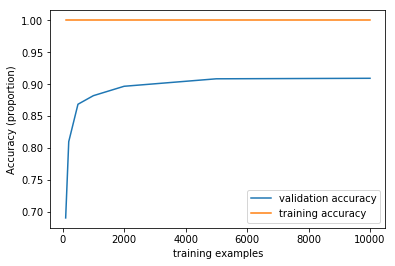

In [60]:
ax = plt.plot(mnist_sizes, mnist_valid_lst, label = 'validation accuracy')
ay = plt.plot(mnist_sizes, mnist_train_lst, label = 'training accuracy')
plt.xlabel('training examples')
plt.ylabel('Accuracy (proportion)')
plt.legend()
#graph code

(b) For the spam dataset, use the provided word frequencies as features. In other words, each document is represented by a vector, where the ith entry denotes the number of times word i (as specified in featurize.py) is found in that document. Train your model with the following number of training examples: 100, 200, 500, 1,000, 2,000, ALL. 

In [62]:
spam_traininglabels = spam_traininglabels.reshape(-1,)

In [63]:
def train_spam(batchsize):
    clf2 = SVC(kernel = 'linear')
    clf2.fit(spam_training[0:batchsize], spam_traininglabels[0:batchsize])
    prediction = clf2.predict(spam_training[0:batchsize])
    accuracy = accuracy_score(spam_traininglabels[0:batchsize], prediction)
    validationp = clf2.predict(spam_validation)
    validacc = accuracy_score(spam_validationlabels, validationp)
    print([accuracy, validacc, batchsize])

In [64]:
train_spam(100)

[0.92, 0.7775628626692457, 100]


In [65]:
train_spam(200)

[0.88, 0.7862669245647969, 200]


In [66]:
train_spam(500)

[0.824, 0.7959381044487428, 500]


In [67]:
train_spam(1000)

[0.814, 0.7959381044487428, 1000]


In [68]:
train_spam(2000)

[0.81, 0.7988394584139265, 2000]


In [69]:
train_spam(5172)

[0.8011116481391977, 0.7978723404255319, 5172]


In [61]:
spam_train_lst = [0.92, 0.88, 0.824, 0.814, 0.81, 0.8011116481391977]
spam_valid_lst = [0.7775628626692457, 0.7862669245647969, 0.7959381044487428, 
                  0.7959381044487428, 0.7988394584139265, 0.7978723404255319]
spam_sizes = [100, 200, 500, 1000, 2000, 5172]
#results

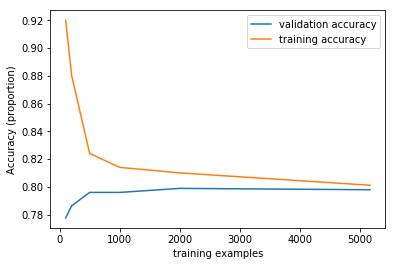

In [62]:
ax = plt.plot(spam_sizes, spam_valid_lst, label = 'validation accuracy')
ay = plt.plot(spam_sizes, spam_train_lst, label = 'training accuracy')
plt.xlabel('training examples')
plt.ylabel('Accuracy (proportion)')
plt.legend()
#graph code

In [70]:
#insert graph here

(c) For the CIFAR-10 dataset, use raw pixels as features. At this stage, you should expect accuracies between 25% and 35%. Be for warned that training SVMs for CIFAR-10 takes a couple minutes to run for a large training set. Train your model with the following numbers of training examples: 100, 200, 500, 1,000, 2,000, 5,000. 

In [72]:
def train_cifar(batchsize):
    clf3 = SVC(kernel = 'linear')
    clf3.fit(c_training[0:batchsize], c_traininglabels[0:batchsize])
    prediction = clf3.predict(c_training[0:batchsize])
    accuracy = accuracy_score(c_traininglabels[0:batchsize], prediction)
    validationp = clf3.predict(c_validation)
    validacc = accuracy_score(c_validationlabels, validationp)
    print([accuracy, validacc, batchsize])

In [73]:
c_traininglabels = c_traininglabels.reshape(-1,)

In [74]:
train_cifar(100)

[1.0, 0.2178, 100]


In [75]:
train_cifar(200)

[1.0, 0.2484, 200]


In [76]:
train_cifar(500)

[1.0, 0.2662, 500]


In [77]:
train_cifar(1000)

[1.0, 0.3002, 1000]


In [78]:
train_cifar(2000)

[1.0, 0.2932, 2000]


In [88]:
train_cifar(5000)

[1.0, 0.2968, 5000]


In [63]:
cifar_train_lst = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
cifar_valid_lst = [0.2178, 0.2484, 0.2662, 0.3002, 0.2932, 0.2968]
cifar_sizes = [100, 200, 500, 1000, 2000, 5000]
#results

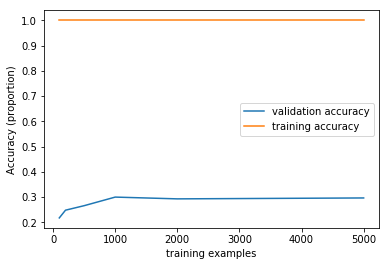

In [64]:
ax = plt.plot(cifar_sizes, cifar_valid_lst, label = 'validation accuracy')
ay = plt.plot(cifar_sizes, cifar_train_lst, label = 'training accuracy')
plt.xlabel('training examples')
plt.ylabel('Accuracy (proportion)')
plt.legend()
#graph code

In [ ]:
#insert graph here

$\textbf{Question 4: Hyperparameter Tuning}$

(a) For the MNIST dataset, ﬁnd the best C value. In your report, list the C values you tried, the corresponding accuracies, and the best C value. As in the previous problem, for performance reasons, you are required to train with up to 10,000 training examples but not required to train with more than that.

In [65]:
tuningset = mnist_validation
tuninglabels = mnist_validationlabels

In [66]:
tuninglabels = tuninglabels.reshape(-1,)

In [ ]:
#default C value for sklearn SVC objects is 1.0

In [ ]:
#we will test the following set of c values: [10^-8, 10^-7, ...., 10^7, 10^8]

In [ ]:
#evaluation metric will be the training accuracy on a training set of size 10000

In [67]:
def c_tune(param):
    clf = SVC(kernel = 'linear', C=param)
    clf.fit(tuningset, tuninglabels)
    predictions = clf.predict(tuningset)
    return accuracy_score(tuninglabels, predictions)

In [68]:
accs = []
#list of training accuracies for the different C parameters

In [69]:
C_params = [1/1000000000, 1/100000000, 1/10000000, 1/100000, 1/10000, 1/1000, 1/100, 1/10, 1, 10^1, 10^2, 10^3, 
            10^4, 10^5, 10^6, 10^7, 10^8]
#list of C params being tested

In [70]:
for y in C_params:
    result = c_tune(y)
    accs.append(result)

In [71]:
print(accs)

[0.6671, 0.8975, 0.9373, 0.9959, 0.9999, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
